In [2]:
# import the libraries :
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [3]:
# KNN is dedicated algorithm for medical field
df=pd.read_csv('heart.csv')

In [4]:
df1=df.copy()

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.shape

(303, 14)

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age            Axes(0.125,0.712609;0.168478x0.167391)
sex         Axes(0.327174,0.712609;0.168478x0.167391)
cp          Axes(0.529348,0.712609;0.168478x0.167391)
trestbps    Axes(0.731522,0.712609;0.168478x0.167391)
chol           Axes(0.125,0.511739;0.168478x0.167391)
fbs         Axes(0.327174,0.511739;0.168478x0.167391)
restecg     Axes(0.529348,0.511739;0.168478x0.167391)
thalach     Axes(0.731522,0.511739;0.168478x0.167391)
exang           Axes(0.125,0.31087;0.168478x0.167391)
oldpeak      Axes(0.327174,0.31087;0.168478x0.167391)
slope        Axes(0.529348,0.31087;0.168478x0.167391)
ca           Axes(0.731522,0.31087;0.168478x0.167391)
thal               Axes(0.125,0.11;0.168478x0.167391)
target          Axes(0.327174,0.11;0.168478x0.167391)
dtype: object

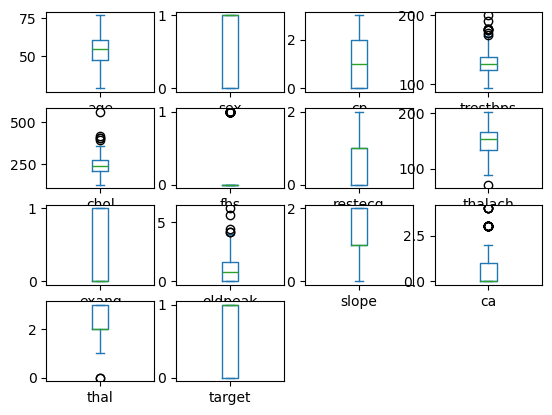

In [11]:
df.plot(kind='box',subplots=True,layout=(4,4))

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
lst=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
#for i in df.columns:
for i in lst:
    print(i,df[i].unique())
    print('###############################################################################')

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
###############################################################################
sex [1 0]
###############################################################################
cp [3 2 1 0]
###############################################################################
trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
###############################################################################
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 

In [14]:
X=df.drop('target',axis=1)
#X=df.iloc[:,1:]
y=df['target']

In [15]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [16]:
#DecisionTreeClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred=dtree.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [20]:
##Training accuracy
y_pred_train=dtree.predict(x_train)
print("Training accuracy:",accuracy_score(y_train,y_pred_train))

Training accuracy: 1.0


In [21]:
#testing accuracy
y_pred_test=dtree.predict(x_test)
print("Testing accuracy:",accuracy_score(y_test,y_pred_test))

Testing accuracy: 0.819672131147541


In [22]:
#Bagging classifier and Random forest

In [23]:

from sklearn.ensemble import RandomForestClassifier

In [24]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [25]:
#traing accuracy
accuracy_score(y_train,rf.predict(x_train))

1.0

In [26]:
#testing accuracy
accuracy_score(y_test,rf.predict(x_test))

0.8524590163934426

In [27]:
#Bagging

In [28]:
from sklearn.ensemble import BaggingClassifier

In [29]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
y_pred=bag.predict(x_test)

In [30]:
#traing accuracy
accuracy_score(y_train,bag.predict(x_train))

0.9834710743801653

In [31]:
#testing accuracy
accuracy_score(y_test,bag.predict(x_test))

0.8524590163934426

In [32]:
# hyper parameter tuning - decision tree

In [33]:
# max_depth
dtree_prun=DecisionTreeClassifier(max_depth=3)
dtree_prun.fit(x_train,y_train)
print('training acc:',accuracy_score(y_train,dtree_prun.predict(x_train)))
print('testing acc:',accuracy_score(y_test,dtree_prun.predict(x_test)))

training acc: 0.8429752066115702
testing acc: 0.8032786885245902


In [34]:
dtree.get_depth()

9

In [35]:
param={'criterion':['gini','entropy','logloss'],\
       'max_depth':[5,6,7,8],\
       'min_samples_split':[3,4,5,6],\
       'min_samples_leaf':[2,3,4,5],\
      }

In [36]:
# grid  Search CV
from sklearn.model_selection import GridSearchCV
#dtree=DecisionTreeClassifier()
#rf=RandomForestClassifier()
cv=GridSearchCV(dtree,param,cv=5,scoring='accuracy') # 5= fold validation 

In [37]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [3, 4, 5, 6]},
             scoring='accuracy')

In [38]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [39]:
y_pred_grid=cv.predict(x_test)


In [40]:
accuracy_score(y_test,y_pred_grid)

0.819672131147541

In [41]:
confusion_matrix(y_test,y_pred_grid)

array([[24,  7],
       [ 4, 26]], dtype=int64)

In [42]:
# hyper parameter tuning - random forest

In [43]:
# max_depth
#rf=RandomForestClassifier()
rf_prun=RandomForestClassifier(max_depth=3)
rf_prun.fit(x_train,y_train)
print('training acc:',accuracy_score(y_train,rf_prun.predict(x_train)))
print('testing acc:',accuracy_score(y_test,rf_prun.predict(x_test)))

training acc: 0.8884297520661157
testing acc: 0.8688524590163934


In [44]:
param={'n_estimators':[100,105,106,108,110],\
      'criterion':['gini','entropy','logloss'],\
       'max_depth':[5,6,7,8],\
       'min_samples_split':[3,4,5,6],\
       'min_samples_leaf':[2,3,4,5],\
      }

In [45]:
# grid  Search CV
from sklearn.model_selection import GridSearchCV
#dtree=DecisionTreeClassifier()
#rf=RandomForestClassifier()
cv=GridSearchCV(rf,param,cv=5,scoring='accuracy') # 5= fold validation 

In [46]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [100, 105, 106, 108, 110]},
             scoring='accuracy')

In [47]:
#cv.best_params_

In [48]:
y_pred_grid=cv.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred_grid)

0.8852459016393442

In [50]:
accuracy_score(y_test,y_pred_grid)

0.8852459016393442

In [51]:
confusion_matrix(y_test,y_pred_grid)

array([[25,  6],
       [ 1, 29]], dtype=int64)

In [52]:
#model building 
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
y_pred=knn.predict(x_test)

In [54]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [55]:
# accuracy
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [56]:
# #Training accuracy
y_pred_train=knn.predict(x_train)
print("Training accuracy:",accuracy_score(y_train,y_pred_train))

Training accuracy: 0.7396694214876033


In [57]:
#testing accuracy
y_pred_test=knn.predict(x_test)
print("Testing accuracy:",accuracy_score(y_test,y_pred_test))

Testing accuracy: 0.6557377049180327


In [58]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
print("Training accuracy:",accuracy_score(y_train,svm.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,svm.predict(x_test)))

Training accuracy: 0.8636363636363636
Testing accuracy: 0.8360655737704918
